# Data Analysis on Nobel Prize Winners From 1901-2019

In [44]:
# Import all the needed libraries
# https://www.kaggle.com/datasets/imdevskp/nobel-prize

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import PercentFormatter

In [45]:
#  Create customizable display settings in Pandas

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [46]:
# Dataset of all Nobel prize awards and laureates from 1901-2019

df = pd.read_csv('Nobel_Prize_Dataset.csv')

In [47]:
# Look at the underlying dataset

df.head()

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,categoryTopMotivation,award_link,id,name,knownName,givenName,familyName,fullName,penName,gender,laureate_link,birth_date,birth_city,birth_cityNow,birth_continent,birth_country,birth_countryNow,birth_locationString,death_date,death_city,death_cityNow,death_continent,death_country,death_countryNow,death_locationString,orgName,nativeName,acronym,org_founded_date,org_founded_city,org_founded_cityNow,org_founded_continent,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,03-Jan,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,745,A. Michael Spence,A. Michael Spence,A. Michael,Spence,A. Michael Spence,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1943-00-00,"Montclair, NJ","Montclair, NJ",North America,USA,USA,"Montclair, NJ, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,03-Jan,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,102,Aage N. Bohr,Aage N. Bohr,Aage N.,Bohr,Aage Niels Bohr,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1922-06-19,Copenhagen,Copenhagen,Europe,Denmark,Denmark,"Copenhagen, Denmark",2009-09-08,Copenhagen,Copenhagen,Europe,Denmark,Denmark,"Copenhagen, Denmark",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,03-Jan,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,779,Aaron Ciechanover,Aaron Ciechanover,Aaron,Ciechanover,Aaron Ciechanover,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1947-10-01,Haifa,Haifa,Asia,British Protectorate of Palestine,Israel,"Haifa, British Protectorate of Palestine (now ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,259,Aaron Klug,Aaron Klug,Aaron,Klug,Aaron Klug,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1926-08-11,Zelvas,Zelvas,Europe,Lithuania,Lithuania,"Zelvas, Lithuania",2018-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,03-Jan,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,114,Abdus Salam,Abdus Salam,Abdus,Salam,Abdus Salam,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1926-01-29,Jhang Maghiāna,Jhang Maghiāna,Asia,India,Pakistan,"Jhang Maghiāna, India (now Pakistan)",1996-11-21,Oxford,Oxford,Europe,United Kingdom,United Kingdom,"Oxford, United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN


In [48]:
# create a 1 for each row and make a new column of that

df['total_count'] = 1

In [49]:
# How many Nobel prizes have been awarded?

df['awardYear'].nunique()

116

In [50]:
# How many total categories are there for the nobel prizes?

df.category.unique()

array(['Economic Sciences', 'Physics', 'Chemistry', 'Peace',
       'Physiology or Medicine', 'Literature'], dtype=object)

In [51]:
# Number of unique values in each columns

def count_unique(column):
    return len(column.unique())

df.apply(count_unique, axis=0).astype(np.int32)

awardYear                     116
category                        6
categoryFullName                6
sortOrder                       3
portion                         4
prizeAmount                    98
prizeAmountAdjusted           114
dateAwarded                   258
prizeStatus                     3
motivation                    664
categoryTopMotivation           9
award_link                    597
id                            943
name                          943
knownName                     920
givenName                     705
familyName                    867
fullName                      920
penName                        12
gender                          3
laureate_link                 943
birth_date                    907
birth_city                    627
birth_cityNow                 624
birth_continent                 7
birth_country                  96
birth_countryNow               83
birth_locationString          646
death_date                    620
death_city    

In [9]:
# By category, how many prizes were given to each field

df.category.value_counts()

Physiology or Medicine    219
Physics                   213
Chemistry                 184
Peace                     134
Literature                116
Economic Sciences          84
Name: category, dtype: int64

Text(0.5, 1.0, 'Bar Chart of Prize Status of Nobel Prize Winners by Category')

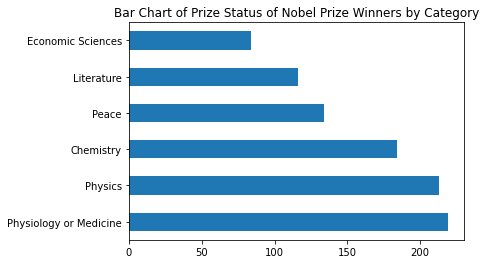

In [10]:
# Bar plot of number of awareded by Nobel Prizes per Category

df.category.value_counts().plot(kind='barh')
plt.title('Bar Chart of Prize Status of Nobel Prize Winners by Category')

In [11]:
# When was Physiology or Medicine first awarded?

dfpm =  df[df['category']=='Physiology or Medicine'].sort_values(by=['awardYear'])

print('The first year recipient for Physiology and Medicine was in', dfpm.iloc[0,0], end= '.')

The first year recipient for Physiology and Medicine was in 1901.

In [12]:
# When was Physics first awarded?

dfp = df[df['category']=='Physics'].sort_values(by=['awardYear'])

print('The first year recipient for Physics was in', dfp.iloc[0,0], end= '.')

The first year recipient for Physics was in 1901.

In [13]:
# When was Chemistry first awarded?

dfc =  df[df['category']=='Chemistry'].sort_values(by=['awardYear'])

print('The first year recipient for Chemistry was in', dfc.iloc[0,0], end= '.')

The first year recipient for Chemistry was in 1901.

In [14]:
# When was Peace first awarded?

dfpe = df[df['category']=='Peace'].sort_values(by=['awardYear'])

print('The first year recipient for Peace was in', dfpe.iloc[0,0], end= '.')

The first year recipient for Peace was in 1901.

In [15]:
# When was Literature first awarded?

dfl = df[df['category']=='Literature'].sort_values(by=['awardYear'])

print('The first year recipient for Literature was in', dfl.iloc[0,0], end= '.')

The first year recipient for Literature was in 1901.

In [16]:
# When was Economic Sciences first awarded?

dfe = df[df['category']=='Economic Sciences'].sort_values(by=['awardYear']).head(1)

print('The first year recipient for Economics was in', dfe.iloc[0,0], end= '.')

The first year recipient for Economics was in 1969.

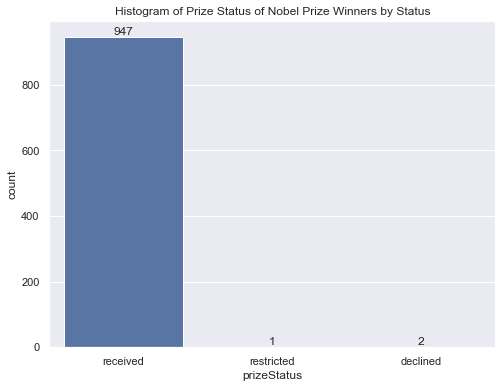

In [17]:
#  Create a histogram of Nobel Prize winners by Status

sns.set(rc={'figure.figsize':(8,6)})
ax =sns.countplot(x='prizeStatus',data=df)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Status')
for container in ax.containers:
    ax.bar_label(container)

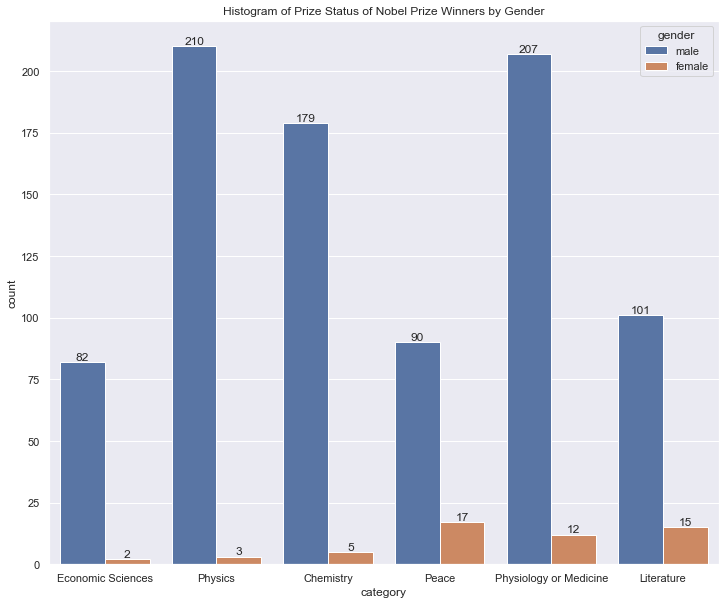

In [18]:
#  Create a histogram of Nobel Prize winners by Gender

sns.set(rc={'figure.figsize':(12,10)})
ax =sns.countplot(x='category',hue = 'gender', data=df)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Gender')
for container in ax.containers:
    ax.bar_label(container)

In [19]:
# Display the number of prizes won by the top 10 nationalities

df['birth_country'].value_counts().head(10)

USA                274
United Kingdom      87
Germany             77
France              53
Sweden              29
Japan               27
Canada              20
Switzerland         19
the Netherlands     18
Russia              17
Name: birth_country, dtype: int64

In [20]:
# Calculating the proportion of USA born winners per decade

df['usa_born_winner'] = df['birth_country'] == 'USA'
year = pd.Series(df['awardYear'])
df['decade'] = (np.floor(year / 10) * 10).astype(int)
prop_usa_winners = df.groupby('decade', as_index = False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade

display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


Text(0.5, 1.0, 'Proportion of USA Nobel Prize Winners Per Decade')

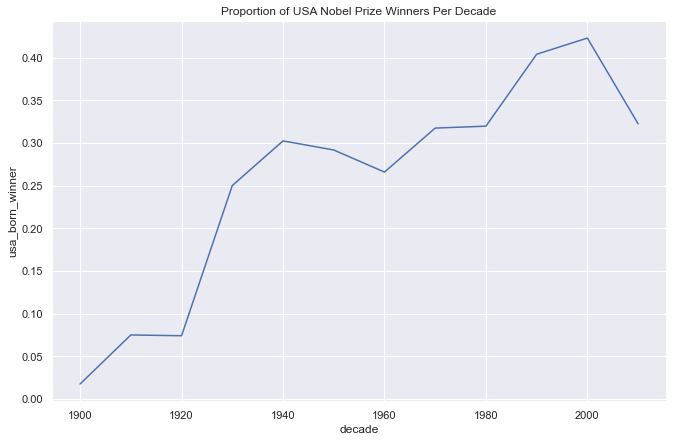

In [21]:
# Setting the plotting theme

sns.set()
ax.yaxis.set_major_formatter(PercentFormatter())
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(data = prop_usa_winners, x = 'decade', y = 'usa_born_winner')
plt.title('Proportion of USA Nobel Prize Winners Per Decade')

In [24]:
# Create a dataframe and find first year a female won the nobel prize

df2 = df[df['gender'] == 'female'].nsmallest(1, 'awardYear')

df2.iloc[0,0]

print('The first female recipient for a Nobel Prize was in', df2.iloc[0,0], end= '.')

The first female recipient for a Nobel Prize was in 1903.

In [84]:
# Create dataframe and find the names of multiple winners

twice_df = df.groupby('fullName').filter(lambda group: len(group) >=2)

print(twice_df[['fullName']].drop_duplicates())

                        fullName
264             Frederick Sanger
457                 John Bardeen
544           Linus Carl Pauling
566  Marie Curie, née Sklodowska


In [73]:
# Look at who declined the Nobel Prize and in what category

declined_df = df.loc[df['prizeStatus'] == 'declined']

print(declined_df[['fullName', 'category']])

             fullName    category
441  Jean-Paul Sartre  Literature
528       Le Duc Tho        Peace


In [21]:
# Create a physics dataframe

physics_df = df.loc[df['category'] == 'Physics']

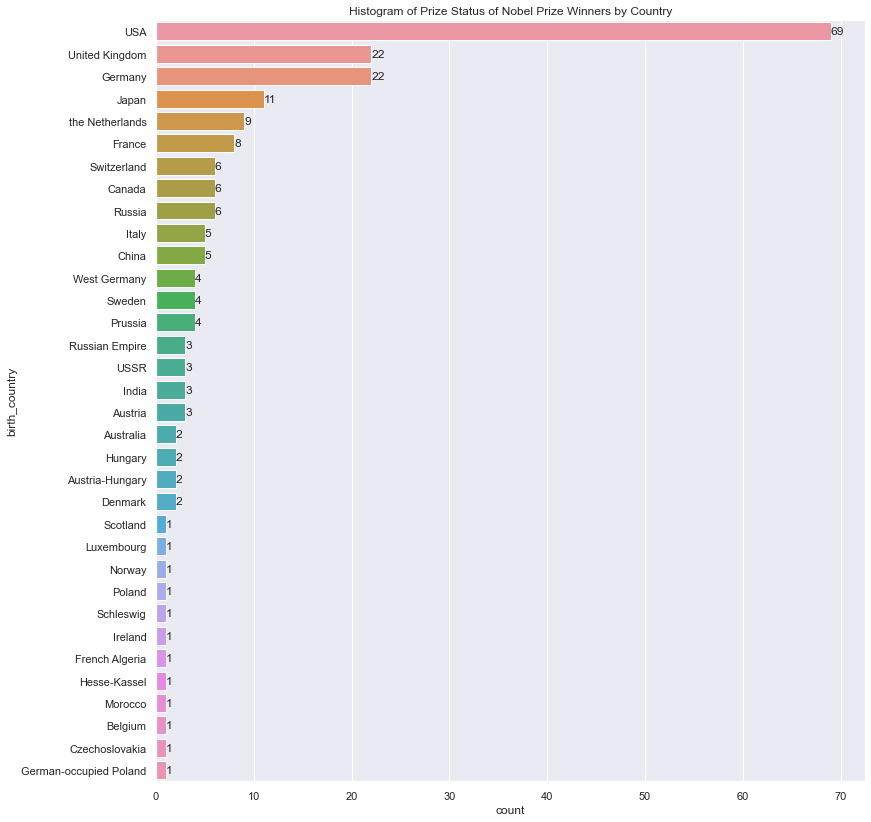

In [22]:
#  Create a histogram of Physics Nobel Prize winners by Country

sns.set(rc={'figure.figsize':(12.7,14)})
ax = sns.countplot(y='birth_country',data=physics_df, order = physics_df['birth_country'].value_counts().index)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Country')
for container in ax.containers:
    ax.bar_label(container)

In [23]:
# Create a Physiology or Medicine dataframe

pm_df = df.loc[df['category'] == 'Physiology or Medicine']

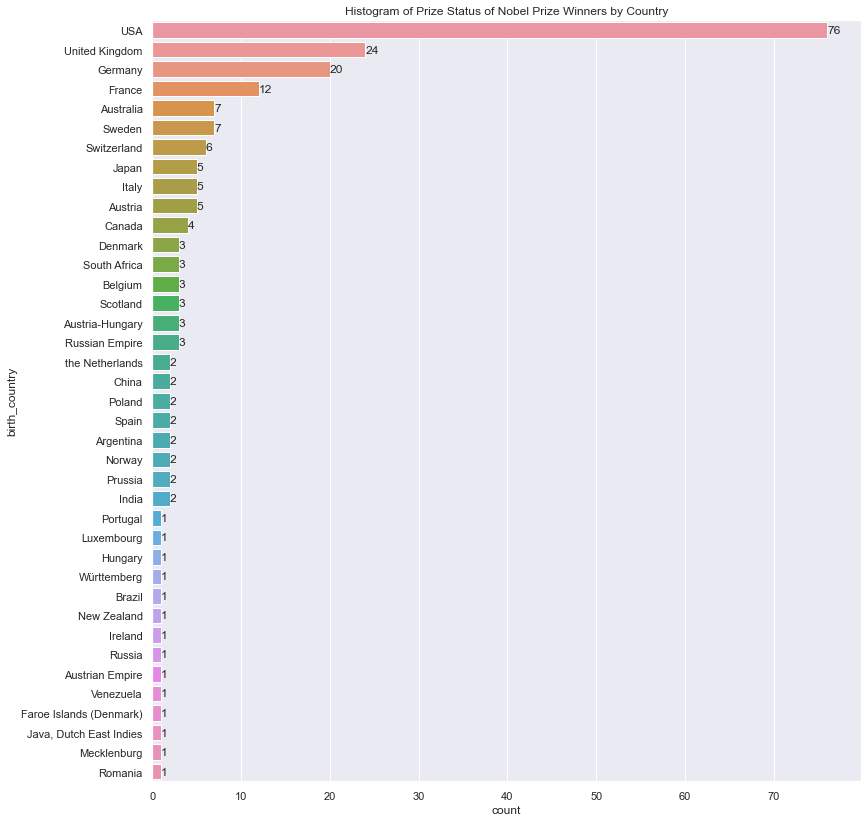

In [24]:
#  Create a histogram of Physiology or Medicine Nobel Prize winners by Country

sns.set(rc={'figure.figsize':(12.7,14)})
ax = sns.countplot(y='birth_country',data= pm_df, order = pm_df['birth_country'].value_counts().index)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Country')
for container in ax.containers:
    ax.bar_label(container)

In [25]:
# Create a Chemistry dataframe

chm_df = df.loc[df['category'] == 'Chemistry']

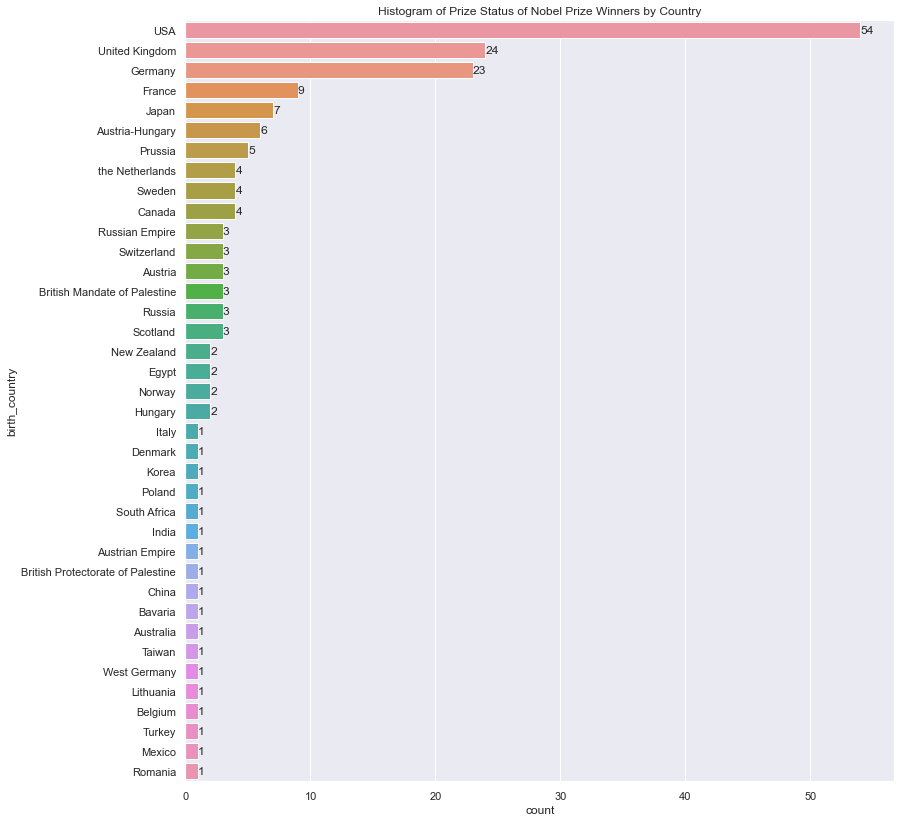

In [26]:
#  Create a histogram of Chemistry Nobel Prize winners by Country

sns.set(rc={'figure.figsize':(12.7,14)})
ax = sns.countplot(y='birth_country',data= chm_df, order = chm_df['birth_country'].value_counts().index)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Country')
for container in ax.containers:
    ax.bar_label(container)

In [27]:
# Create a Peace dataframe

peace_df = df.loc[df['category'] == 'Peace']

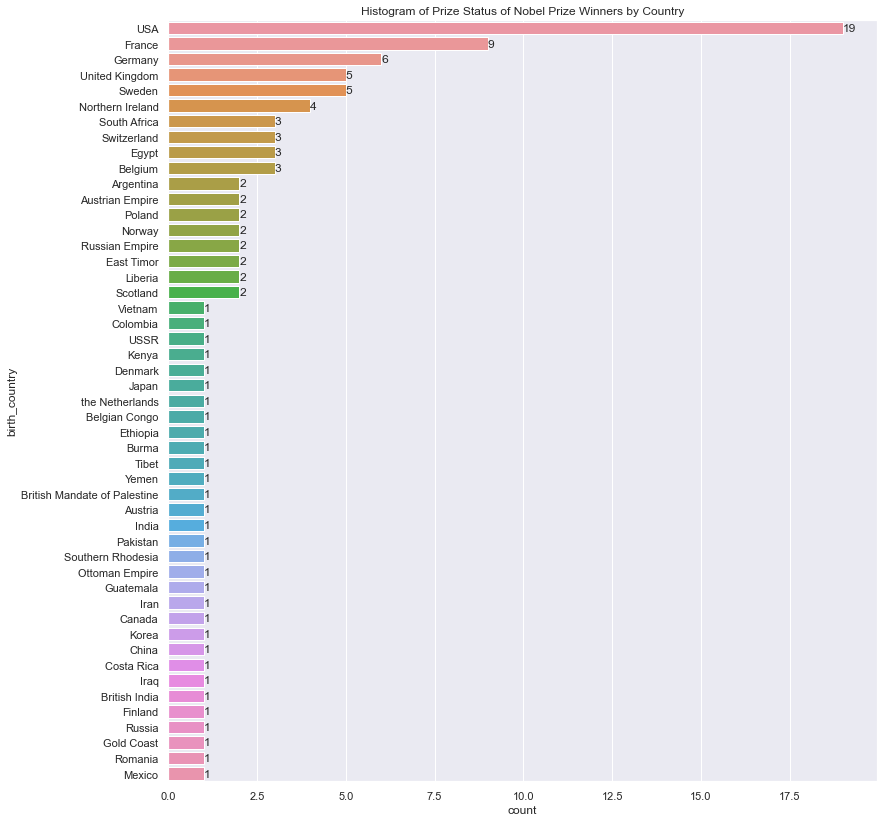

In [28]:
#  Create a histogram of Peace Nobel Prize winners by Country

sns.set(rc={'figure.figsize':(12.7,14)})
ax = sns.countplot(y='birth_country',data= peace_df, order = peace_df['birth_country'].value_counts().index)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Country')
for container in ax.containers:
    ax.bar_label(container)

In [29]:
# Create a Literature dataframe

lit_df = df.loc[df['category'] == 'Literature']

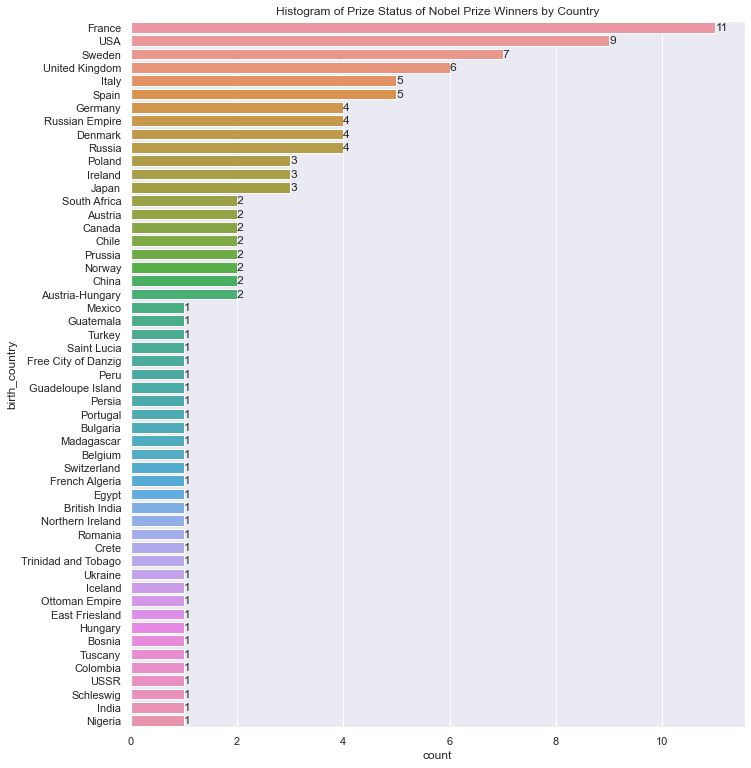

In [34]:
#  Create a histogram of Literature Nobel Prize winners by Country

sns.set(rc={'figure.figsize':(11,13)})
ax = sns.countplot(y='birth_country',data= lit_df, order = lit_df['birth_country'].value_counts().index)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Country')
for container in ax.containers:
    ax.bar_label(container)

In [31]:
# Create a Literature dataframe

es_df = df.loc[df['category'] == 'Economic Sciences']

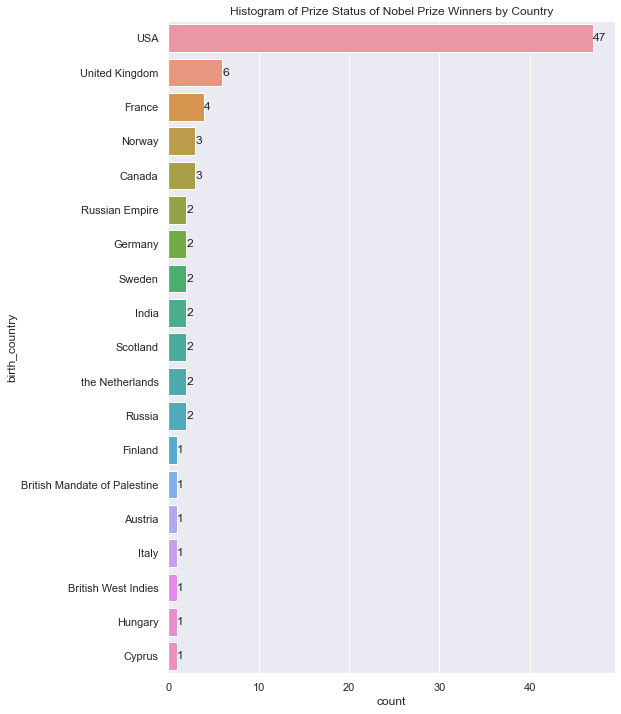

In [33]:
#  Create a histogram of Economic Sciences Nobel Prize winners by Country

sns.set(rc={'figure.figsize':(8,12)})
ax = sns.countplot(y='birth_country',data= es_df, order = es_df['birth_country'].value_counts().index)
plt.title('Histogram of Prize Status of Nobel Prize Winners by Country')
for container in ax.containers:
    ax.bar_label(container)